<a href="https://colab.research.google.com/github/sree-hari-s/CaseStudy-Fast-Food/blob/main/Case_Study_Fast_Food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

In the context of the fast-food industry, specifically focusing on McDonald's, there is a need to investigate and understand whether distinct consumer segments with varying brand perceptions exist. The purpose of this study is to identify these systematic differences in brand perception among different market segments, with the ultimate goal of informing strategic decisions regarding target markets and brand messaging. Specifically, the problem to be addressed is how to either reinforce positive brand perceptions within certain segments or improve negative perceptions in others, by identifying and modifying the key drivers of negative brand perception.


In [1]:
import pandas as pd

## Exploring Data

In [2]:
data = pd.read_csv('https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv')
data.columns.values.tolist()
data1 = data.copy()

In [3]:
data.shape

(1453, 15)

In [4]:
data.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


## Observation of the First Respondent

In the dataset, the first respondent's perceptions of McDonald's are characterized by a series of negative descriptors. They believe that McDonald's is not yummy, convenient, spicy, greasy, fast, cheap, tasty, healthy, and is also considered as fattening and expensive. Furthermore, the respondent holds a strongly negative sentiment towards McDonald's, evident from their rating of -3. Additional demographic information reveals that this respondent is a 61-year-old female who frequents McDonald's approximately every three months.

This initial observation provides a snapshot of one respondent's perceptions and characteristics within the dataset, offering valuable insight into individual preferences and demographics.


## Data Transformation: Converting Verbal Segmentation Variables to Numeric

Upon examining the dataset, it becomes evident that the segmentation variables, particularly perceptions of McDonald's, are expressed verbally as "YES" and "NO." However, for effective segment extraction, numerical data is required. Therefore, the data needs to be converted from verbal to numeric format.

The process of data transformation begins by selecting the first eleven columns of the dataset, which contain the segmentation variables. These columns are then converted into a matrix format. Subsequently, all "YES" entries in the matrix are identified, resulting in a logical matrix with values of "TRUE" and "FALSE."

To achieve a numeric representation, the logical matrix is modified by adding 0, which converts "TRUE" to 1 and "FALSE" to 0. This conversion allows for quantitative analysis of the segmentation variables.

A crucial validation step involves inspecting the average value of each transformed segmentation variable to ensure that the data has been correctly converted and is ready for further analysis.


In [5]:
MD=data.iloc[:,0:11].replace("Yes",1).replace("No",0)
mean=round(MD.mean(),2)
mean

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

Upon analyzing the transformed binary numeric segmentation variables, the following insights emerge:

- Approximately 55% of the respondents perceive McDonald's as YUMMY.
- A substantial 91% of respondents believe that eating at McDonald's is CONVENIENT.
- However, only a small fraction, just 9% of respondents, think that McDonald's food is SPICY.


In [6]:
import numpy as np
from sklearn.decomposition import PCA

## Principal Components Analysis and Perceptual Map

To gain a deeper understanding of the data and explore initial insights, a principal components analysis is conducted. This analysis serves as a tool to create a perceptual map, shedding light on how respondents rate various attributes and the relationships between these attributes.

It's important to note that the principal components analysis in this case is not intended to reduce the number of variables. Instead, it's primarily used for rotating and projecting the data for the creation of the perceptual map. This approach, often referred to as factor-cluster analysis, is employed here to optimize the visualization of the data. Unstandardized data is used for this analysis because the segmentation variables are binary in nature.

By generating a perceptual map, the study aims to provide a visual representation of how attributes are rated by respondents and to identify patterns in how these attributes are typically rated in conjunction with one another.


In [7]:
pca = PCA()
MD_pca=pca.fit_transform(MD)
MD_p=pca.fit(MD)

SD=np.sqrt(pca.explained_variance_)
PV=pca.explained_variance_ratio_
index=[]
for i in range(len(SD)):
    i=i+1
    index.append("PC{}".format(i))

sum=pd.DataFrame({
    "Standard deviation":SD,"Proportion of Variance":PV,"Cumulative Proportion":PV.cumsum()
},index=index)
sum

,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,0.757050,0.299447,0.299447
PC2,0.607456,0.192797,0.492244
PC3,0.504619,0.133045,0.625290
PC4,0.398799,0.083096,0.708386
PC5,0.337405,0.059481,0.767866
PC6,0.310275,0.050300,0.818166
PC7,0.289697,0.043849,0.862015
PC8,0.275122,0.039548,0.901563
PC9,0.265251,0.036761,0.938323
PC10,0.248842,0.032353,0.970677


The principal components analysis reveals that the first two components account for approximately 50% of the information embedded within the segmentation variables. These components are instrumental in summarizing and explaining a significant portion of the variability in the data.

To further examine the relationships and contributions of individual variables to these components, the following command is executed to return the factor loadings.

In [8]:
print("Standard Deviation:\n",SD.round(1))
load = (pca.components_)

Standard Deviation:
 [0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


In [9]:
rotation_matrix = MD_p.components_.T
rotation_df = pd.DataFrame(rotation_matrix, index=MD.columns.values, columns=index)
rotation_df=round(-rotation_df,3)
rotation_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,0.477,-0.364,0.304,-0.055,0.308,-0.171,0.281,-0.013,-0.572,0.110,-0.045
convenient,0.155,-0.016,0.063,0.142,-0.278,0.348,0.060,0.113,0.018,0.666,0.542
spicy,0.006,-0.019,0.037,-0.198,-0.071,0.355,-0.708,-0.376,-0.400,0.076,-0.142
fattening,-0.116,0.034,0.322,0.354,0.073,0.407,0.386,-0.590,0.161,0.005,-0.251
greasy,-0.304,0.064,0.802,-0.254,-0.361,-0.209,-0.036,0.138,0.003,-0.009,-0.002
fast,0.108,0.087,0.065,0.097,-0.108,0.595,0.087,0.628,-0.166,-0.240,-0.339
cheap,0.337,0.611,0.149,-0.119,0.129,0.103,0.040,-0.140,-0.076,-0.428,0.489
tasty,0.472,-0.307,0.287,0.003,0.211,0.077,-0.360,0.073,0.639,-0.079,-0.020
expensive,-0.329,-0.601,-0.024,-0.068,0.003,0.261,0.068,-0.030,-0.067,-0.454,0.490
healthy,0.214,-0.077,-0.192,-0.763,-0.288,0.178,0.350,-0.176,0.186,0.038,-0.158


In [10]:
from bioinfokit.visuz import cluster

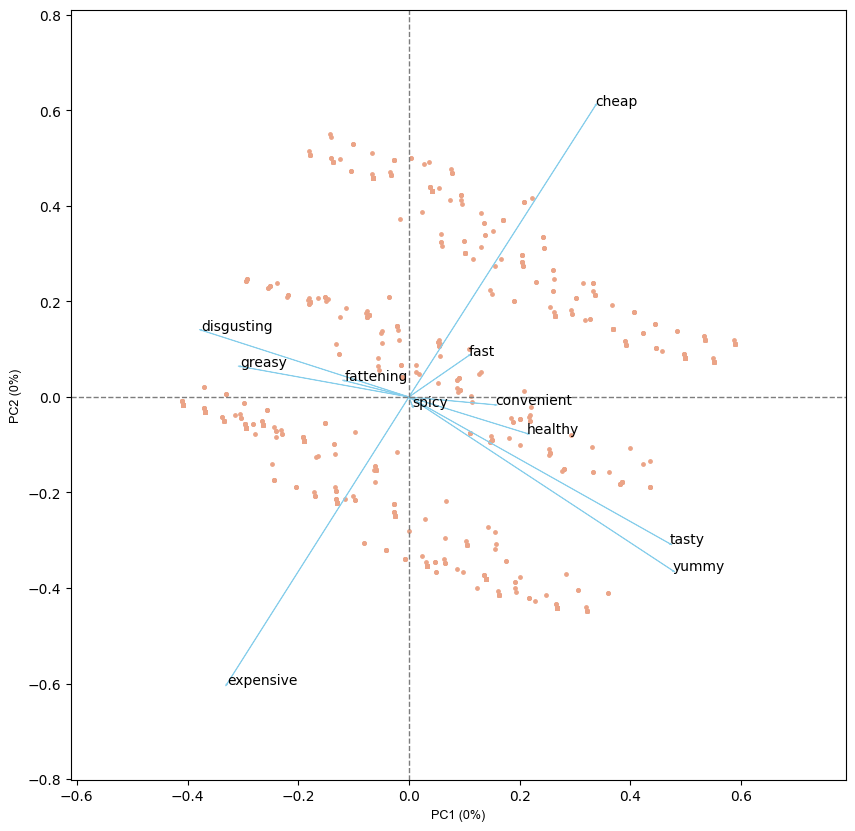

In [11]:
cluster.biplot(cscore=MD_pca, loadings=-load, labels=data.columns.values,var1=0,var2=0, show=True, dim=(10, 10))

## Extracting Segments

To illustrate a range of extraction techniques,
we subdivide this step into three sections. In the first section, we will use standard
k-means analysis. In the second section, we will use finite mixtures of binary
distributions. In the third section, we will use finite mixtures of regressions.

In [12]:
from sklearn.cluster import KMeans

### Using k-Means

In [13]:
np.random.seed(1234)

nrep = 10

num_segments = range(1, 9)
within_cluster_distances = []
MD_km28 = {}

for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(MD)
    within_cluster_distances.append((kmeans.inertia_))
    MD_km28[str(k)] = kmeans

In [14]:
import matplotlib.pyplot as plt

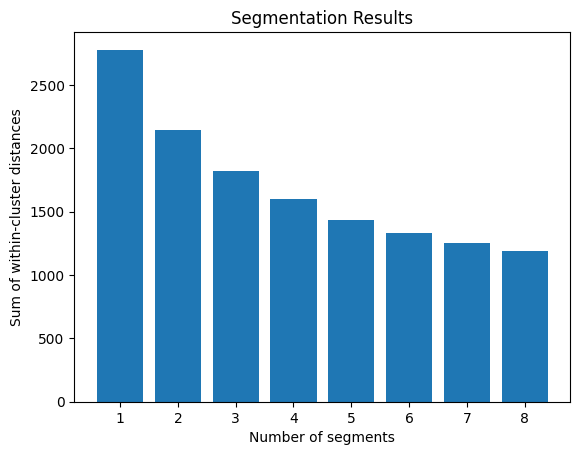

In [15]:
plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()

In [16]:
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

In [17]:
np.random.seed(1234)
nboot = 100
nrep = 10

bootstrap_samples = []
for _ in range(nboot):
    bootstrap_sample = resample(MD.values, random_state=1234)
    bootstrap_samples.append(bootstrap_sample)

adjusted_rand_index = []
num_segments = range(2, 9)
for k in num_segments:
    stability_scores = []
    for bootstrap_sample in bootstrap_samples:
        kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
        kmeans.fit(bootstrap_sample)
        cluster_labels = kmeans.predict(bootstrap_sample)
        true_labels = kmeans.predict(MD.values)
        stability_score = adjusted_rand_score(true_labels, cluster_labels)
        stability_scores.append(stability_score)
    adjusted_rand_index.append(stability_scores)

# Transpose the adjusted_rand_index list
adjusted_rand_index = np.array(adjusted_rand_index).T

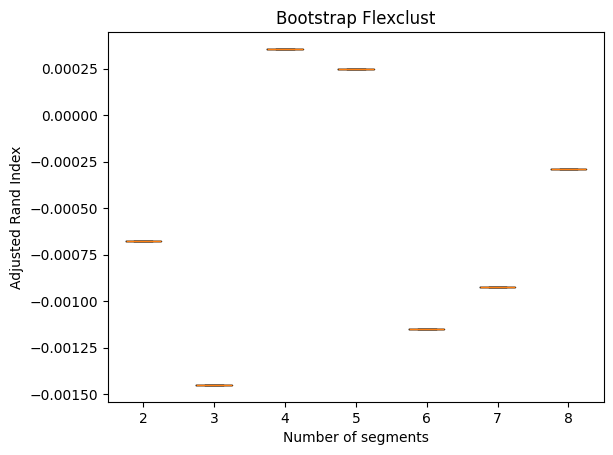

In [18]:
# Create boxplot of adjusted Rand index
plt.boxplot(adjusted_rand_index, labels=num_segments, whis=10)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrap Flexclust")
plt.show()

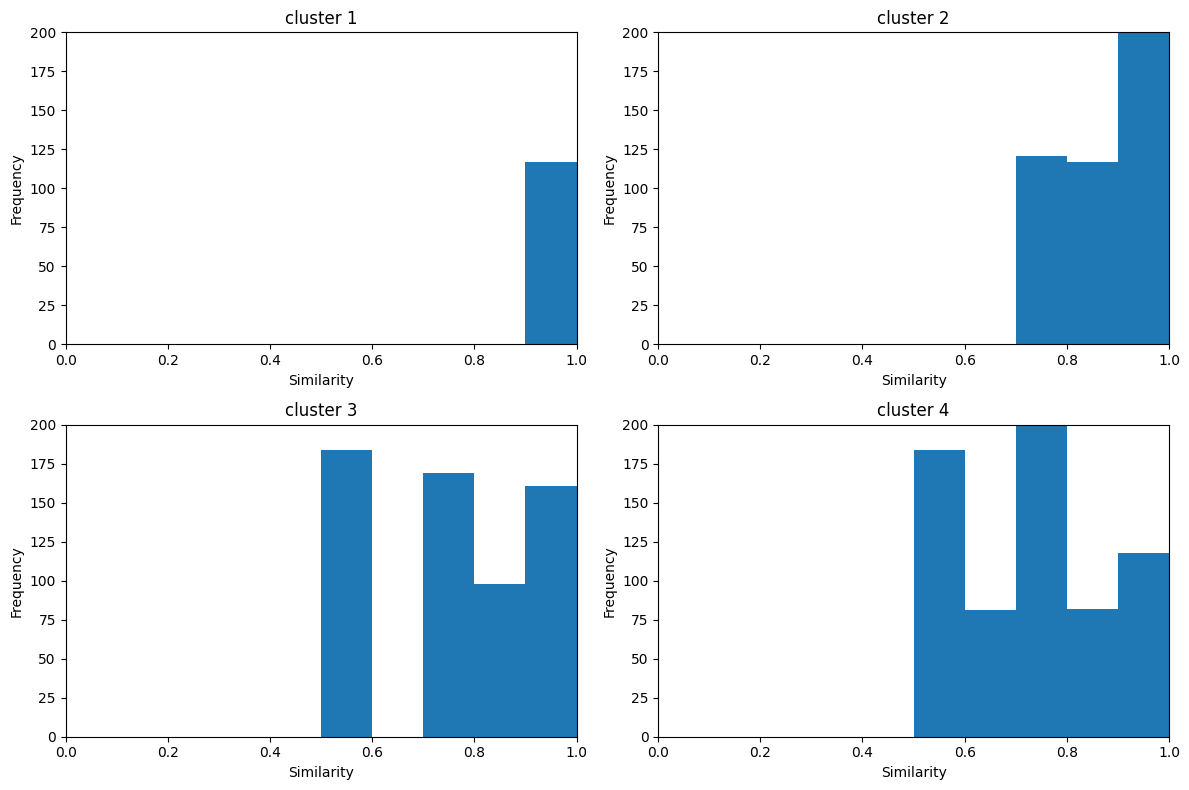

In [19]:
range_values = (0, 1)
num_bins = 10
max_frequency = 200


fig, axs = plt.subplots(2, 2, figsize=(12, 8))


for i in range(1, 5):
    labels = MD_km28[str(i)].predict(MD)
    similarities = MD_km28[str(i)].transform(MD).min(axis=1)
    row = (i - 1) // 2
    col = (i - 1) % 2

    axs[row, col].hist(similarities, bins=num_bins, range=range_values)
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title('cluster {}'.format(i))

    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)


    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.tight_layout()
plt.show()

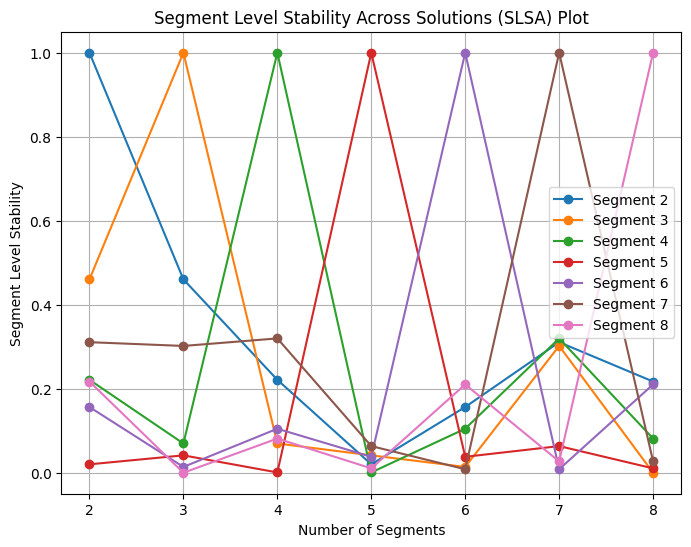

In [20]:
num_segments = range(2, 9)

segment_stability = []
for segment in range(2, 9):
    labels_segment = MD_km28[str(segment)].predict(MD)
    segment_stability.append(labels_segment)

plt.figure(figsize=(8, 6))
for i, segment in enumerate(range(2, 9)):
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability], marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

plt.show()

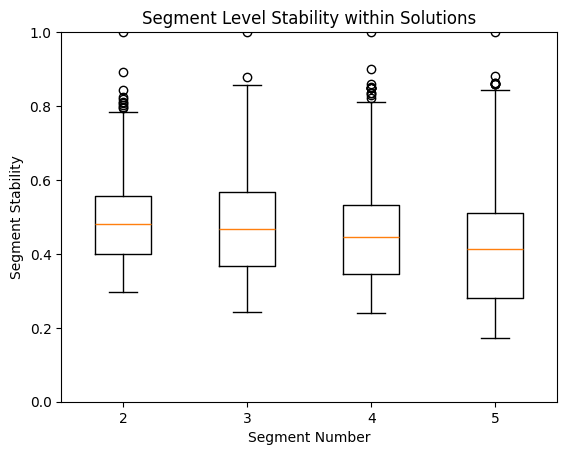

In [21]:
segment_solutions = ["2", "3", "4", "5"]
segment_labels = {}
segment_similarities = {}

for segment in segment_solutions:
    segment_labels[segment] = MD_km28[segment].predict(MD)
    segment_similarities[segment] = MD_km28[segment].transform(MD).min(axis=1)

segment_stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities)
    segment_stability_values.append(normalized_similarities)

plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")

plt.show()

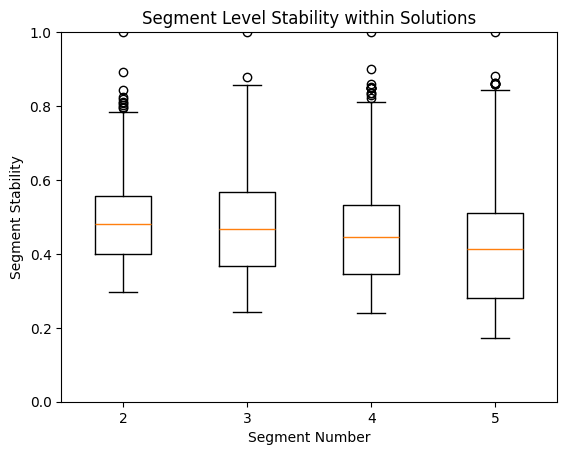

In [22]:
segment_solutions = ["2", "3", "4", "5"]
segment_labels = {}
segment_similarities = {}

for segment in segment_solutions:
    segment_labels[segment] = MD_km28[segment].predict(MD)
    segment_similarities[segment] = MD_km28[segment].transform(MD).min(axis=1)

segment_stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities)
    segment_stability_values.append(normalized_similarities)

plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")

plt.show()

In [23]:
from scipy.stats import entropy

np.random.seed(1234)
k_values = range(2, 9)
MD_m28 = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(MD.values)
    iter_val = model.n_iter_
    converged = True
    k_val = k
    k0_val = k
    log_likelihood = -model.inertia_
    n_samples, _ = MD.shape
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    icl = bic - class_entropy

    MD_m28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))
MD_m28 = pd.DataFrame(MD_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

print(MD_m28)

d:\Work\Feynn Labs\Projects\MY-WORK\CaseStudy-Fast-Food\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Work\Feynn Labs\Projects\MY-WORK\CaseStudy-Fast-Food\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Work\Feynn Labs\Projects\MY-WORK\CaseStudy-Fast-Food\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Work\Feynn Labs\Projects\MY-WORK\CaseStudy-Fast-Food\env\Lib\site-p

   iter  converged  k  k0       logLik          AIC          BIC          ICL
0     8       True  2   2 -2145.503727  4295.007454  4305.570225  4304.904547
1     9       True  3   3 -1818.717659  3643.435318  3659.279475  3658.209672
2     7       True  4   4 -1602.986015  3213.972030  3235.097572  3233.753684
3    13       True  5   5 -1435.324786  2880.649571  2907.056500  2905.465473
4    10       True  6   6 -1332.150483  2676.300966  2707.989280  2706.201149
5    10       True  7   7 -1249.233890  2512.467780  2549.437480  2547.530062
6    10       True  8   8 -1191.580948  2399.161896  2441.412982  2439.379225


d:\Work\Feynn Labs\Projects\MY-WORK\CaseStudy-Fast-Food\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Work\Feynn Labs\Projects\MY-WORK\CaseStudy-Fast-Food\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Work\Feynn Labs\Projects\MY-WORK\CaseStudy-Fast-Food\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


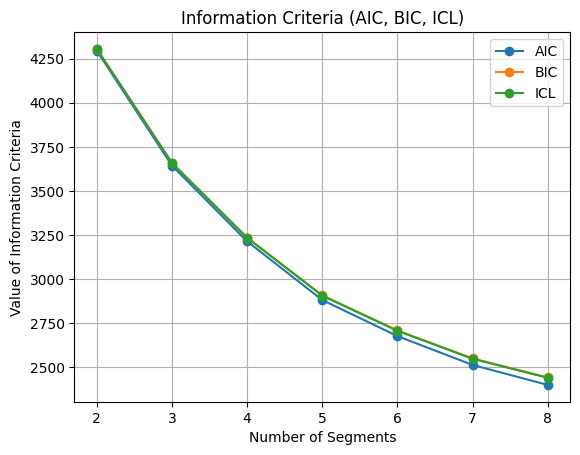

In [24]:
num_segments = MD_m28["k"]
AIC_values = MD_m28["AIC"]
BIC_values = MD_m28["BIC"]
ICL_values = MD_m28["ICL"]

plt.plot(num_segments, AIC_values, marker='o', label='AIC')
plt.plot(num_segments, BIC_values, marker='o', label='BIC')
plt.plot(num_segments, ICL_values, marker='o', label='ICL')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.grid(True)

plt.show()

In [25]:
from sklearn.mixture import GaussianMixture
k = 4
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(MD)
kmeans_clusters = kmeans.predict(MD)

gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(MD)
gmm_clusters = gmm.predict(MD)

results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

MD_m4 = MD[results['mixture'] == 3]

k4_m4 = KMeans(n_clusters=k, random_state=1234)
k4_m4.fit(MD_m4)
k4_m4_clusters = k4_m4.predict(MD_m4)

results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

print(pd.crosstab(results['kmeans'], results['mixture']))
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))

mixture    0    1    2    3
kmeans                     
0         99    5  253    7
1          0  211   24    5
2        500    0    0   33
3         22   38    0  256
kmeans   0   1   2   3
kmeans                
0       29  10  17  23
1       18   8  12  11
2       45  14  31  19
3       29   5  15  15


d:\Work\Feynn Labs\Projects\MY-WORK\CaseStudy-Fast-Food\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Work\Feynn Labs\Projects\MY-WORK\CaseStudy-Fast-Food\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [26]:
from sklearn.mixture import GaussianMixture
import numpy as np

gmm_m4a = GaussianMixture(n_components=4)
gmm_m4a.fit(MD)

log_likelihood_m4a = gmm_m4a.score(MD)

gmm_m4 = GaussianMixture(n_components=4)
gmm_m4.fit(MD)

log_likelihood_m4 = gmm_m4.score(MD)

print("Log-likelihood for MD.m4a:", log_likelihood_m4a)
print("Log-likelihood for MD.m4:", log_likelihood_m4)

Log-likelihood for MD.m4a: 9.456781748071885
Log-likelihood for MD.m4: 3.642746401176581


In [27]:
like_counts = pd.value_counts(data['Like'])
reversed_counts = like_counts.iloc[::-1]

print(reversed_counts)

Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: count, dtype: int64


C:\Users\sreeh\AppData\Local\Temp\ipykernel_28864\225138625.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  like_counts = pd.value_counts(data['Like'])


In [28]:
# Define a mapping of string values to numeric codes
like_mapping = {
    'I HATE IT!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    'I LOVE IT!+5': 5
}

data['Like.n'] = data['Like'].map(like_mapping)


like_n_counts = data['Like.n'].value_counts()


print(like_n_counts)

Like.n
 0.0    169
-3.0     73
-4.0     71
-2.0     59
-1.0     58
Name: count, dtype: int64


In [29]:
from patsy import dmatrices

independent_vars = data.columns[0:11]

formula_str = ' + '.join(independent_vars)

formula_str = 'Like ~ ' + formula_str


f = dmatrices(formula_str, data=data)[1]

print(f)

[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [30]:
from sklearn.mixture import GaussianMixture
from patsy import dmatrix
np.random.seed(1234)

X = dmatrix(f.design_info, data=data)
y = dmatrix('Like', data=data)

n_components = 2
n_init = 10
verbose = False
n_rep=10

model = GaussianMixture(n_components=n_components, n_init=n_init, verbose=verbose)
MD_reg2 = model.fit(X, y)

print(MD_reg2)
cluster_sizes = np.bincount(model.predict(X))

print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i+1}: {size}")

GaussianMixture(n_components=2, n_init=10, verbose=False)
Cluster sizes:
1: 985
2: 468


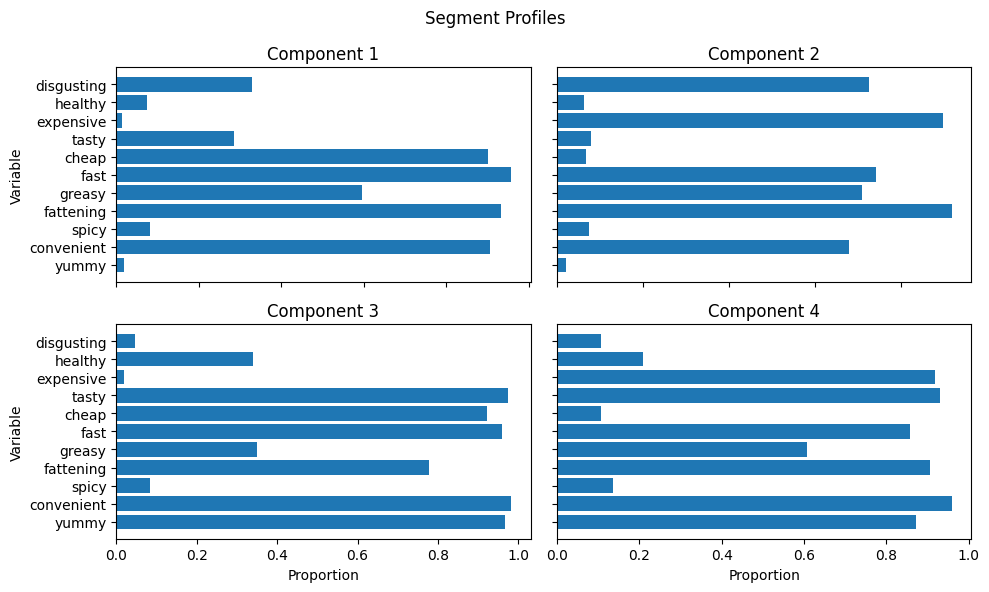

In [31]:
kmeans = MD_km28['4']

labels = kmeans.labels_

MD_mean = MD.groupby(labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[3])
axs[1, 1].set_title('Component 4')

for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(MD.columns)

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment Profiles')

fig.tight_layout()

plt.show()

d:\Work\Feynn Labs\Projects\MY-WORK\CaseStudy-Fast-Food\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


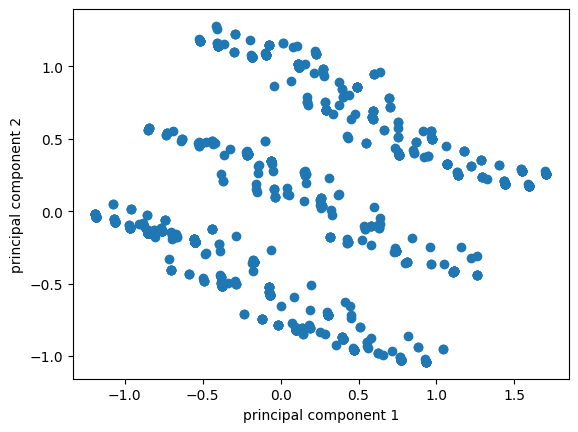

In [32]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(MD)

pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD)

fig, ax = plt.subplots()

ax.scatter(MD_pca[:, 0], MD_pca[:, 1])
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.show()

In [33]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
#Label encoding for categorical - Converting 11 cols with yes/no

from sklearn.preprocessing import LabelEncoder
def labelling(x):
    data1[x] = LabelEncoder().fit_transform(data1[x])
    return data1

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
data1
df_eleven = data1.loc[:,cat]
df_eleven
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)
data1['cluster_num'] = kmeans.labels_
crosstab =pd.crosstab(data1['cluster_num'],data1['Like'])
#Reordering cols
data1
crosstab = crosstab[['I hate it!-5','-4','-3','-2','-1','0','1','2','3','4','I love it!+5']]
crosstab
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()

d:\Work\Feynn Labs\Projects\MY-WORK\CaseStudy-Fast-Food\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KeyError: "['1', '2', '3', '4'] not in index"

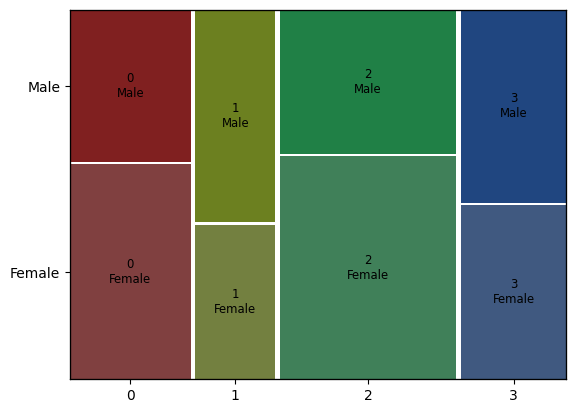

In [34]:
from statsmodels.graphics.mosaicplot import mosaic

MD_k4=MD_km28['4']
k4 = MD_k4.labels_

ct = pd.crosstab(k4, data['Gender'])
ct
mosaic(ct.stack(),gap=0.01)

plt.show()

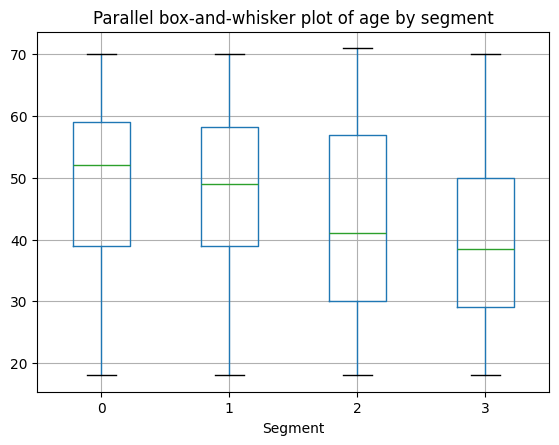

In [35]:
df = pd.DataFrame({'Segment': k4, 'Age': data['Age']})

df.boxplot(by='Segment', column='Age')
plt.title('Parallel box-and-whisker plot of age by segment')
plt.suptitle('')
plt.show()

In [36]:
data1['VisitFrequency'] = LabelEncoder().fit_transform(data1['VisitFrequency'])
visit = data1.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.809061
1,1,2.584483
2,2,2.540123
3,3,2.679167


In [37]:
#Like
data1['Like'] = LabelEncoder().fit_transform(data1['Like'])
Like = data1.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,5.423948
1,1,3.794828
2,2,3.808642
3,3,6.775000


In [38]:
data1['Gender'] = LabelEncoder().fit_transform(data1['Gender'])
Gender = data1.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.407767
1,1,0.398276
2,2,0.521605
3,3,0.579167


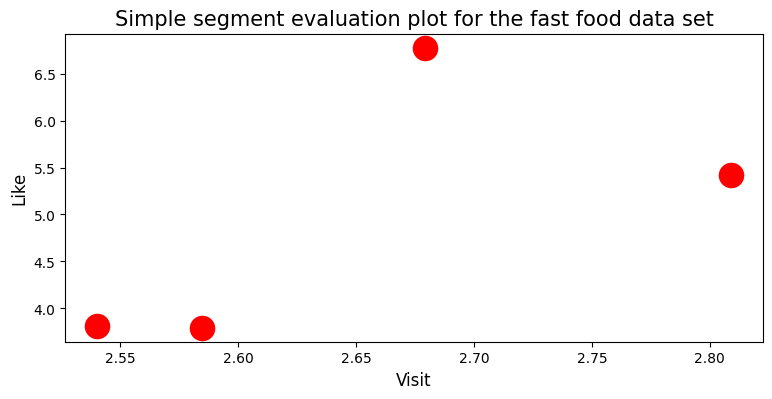

In [39]:
import seaborn as sns
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",fontsize = 15)
plt.xlabel("Visit", fontsize = 12)
plt.ylabel("Like", fontsize = 12)
plt.show()